In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Let's load the dataset

We will load the dataset using pandas and get an overview of it

In [3]:
gems_df = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')

Let's take a look how the dataset looks like

In [4]:
gems_df.head(10) # short view

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


We can now get an overview of the columns

In [5]:
gems_df.info() # column stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


The dataset doesn't seem to have null values, which is great

# EDA

We will explore the categorical and numerical variables

## Categorical Variables

Let's have a look at the categorical variables that we have

### Cut

In [6]:
gems_df['cut'].value_counts() 

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='price'>

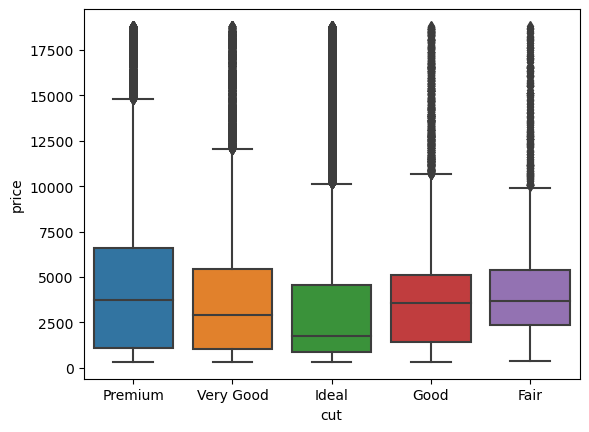

In [7]:
sns.boxplot(gems_df, x='cut', y='price')

There seems to be no apparent correlation

### Color

In [8]:
gems_df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='price'>

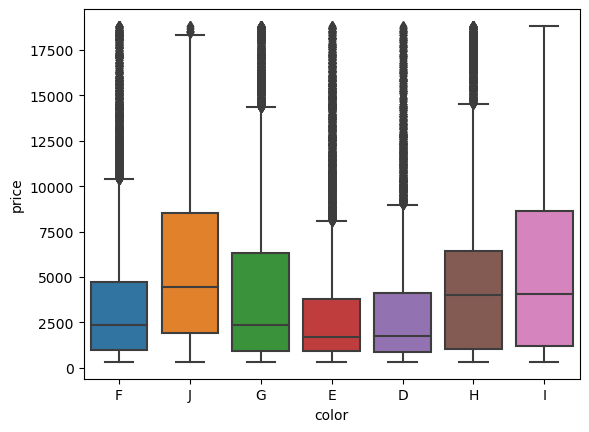

In [9]:
sns.boxplot(gems_df, x='color', y='price')

No correlation here too

### Clarity

In [10]:
gems_df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='price'>

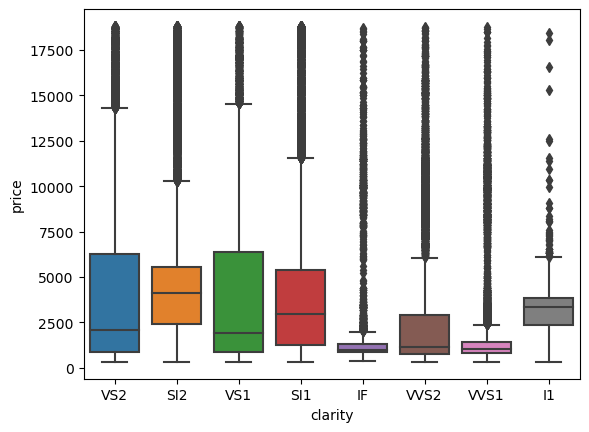

In [11]:
sns.boxplot(gems_df, x='clarity', y='price')

No correlation here too

## Numerical Variables

In [12]:
gems_df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


Lets look at the distributions

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

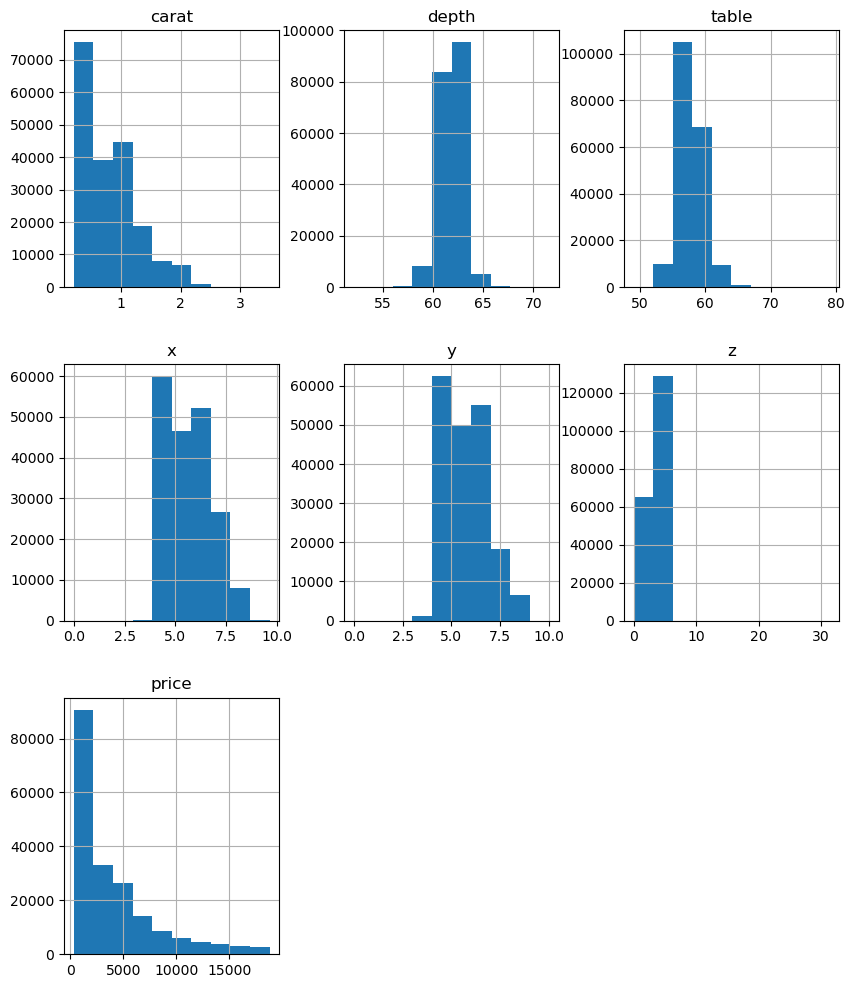

In [13]:
gems_df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].hist(bins=10, figsize=(10, 12))

Lets look at correlations

In [14]:
gems_df_corr = gems_df.corr()

In [15]:
gems_df_corr['price']

id      -0.001392
carat    0.943396
depth    0.001880
table    0.174915
x        0.901004
y        0.901033
z        0.893037
price    1.000000
Name: price, dtype: float64

There seems to be good correlations between some features. Let's plot them

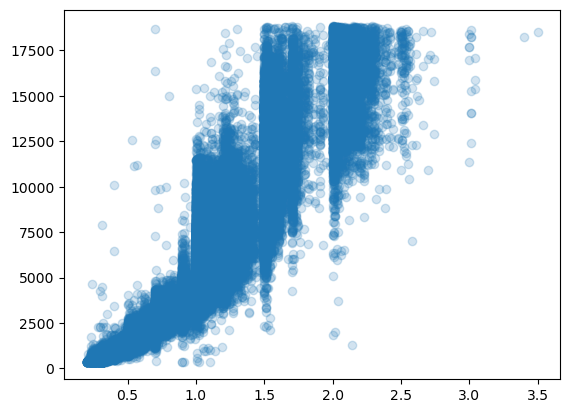

In [16]:
plt.scatter(gems_df['carat'], gems_df['price'], alpha=0.2)

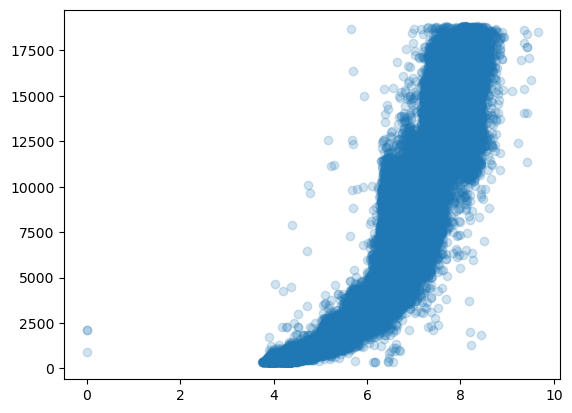

In [17]:
plt.scatter(gems_df['x'], gems_df['price'], alpha=0.2)

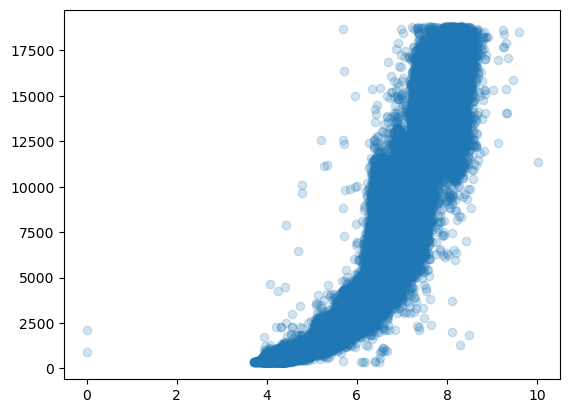

In [18]:
plt.scatter(gems_df['y'], gems_df['price'], alpha=0.2)

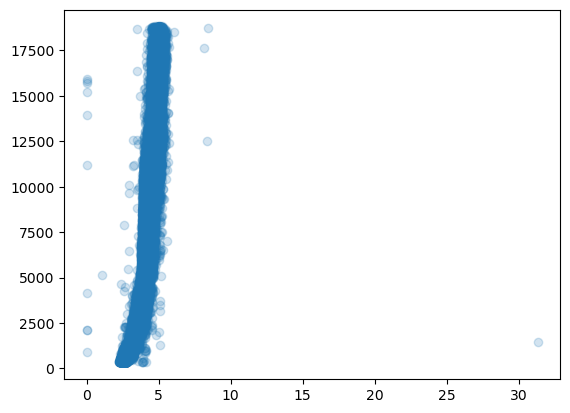

In [19]:
plt.scatter(gems_df['z'], gems_df['price'], alpha=0.2)

The carat seems to have direct correlation. Where as others seems to have some correlation with a bit of outliers. 

# Let's split the data

In [20]:
(train_df, test_df) = train_test_split(gems_df, test_size=0.2, random_state=42)

In [21]:
train_df.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
83475,83475,0.32,Premium,E,SI1,61.6,58.0,4.38,4.41,2.71,614
160324,160324,1.20,Premium,F,VS2,62.6,57.0,6.81,6.76,4.25,7002
101740,101740,1.50,Ideal,I,VS2,62.2,55.0,7.30,7.26,4.53,9347
180341,180341,1.67,Premium,I,SI2,61.9,59.0,7.65,7.61,4.71,8525
48480,48480,1.00,Good,H,VS2,63.7,60.0,6.34,6.30,4.02,5217
102,102,0.52,Very Good,E,SI1,58.8,58.0,5.28,5.34,3.11,1337
173290,173290,0.70,Premium,F,SI1,62.5,59.0,5.69,5.66,3.55,2838
129741,129741,0.42,Ideal,G,VS2,60.2,56.0,4.86,4.84,2.92,1035
46148,46148,0.41,Premium,E,SI1,62.1,56.0,4.77,4.74,2.95,1017
50270,50270,1.01,Premium,F,SI2,61.7,59.0,6.39,6.42,3.95,4025


In [22]:
# dropping the id columns
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

# Let's Train Models

## Numerical Data Only

### Linear Regression

In [23]:
train_df_numerical = train_df[['carat', 'depth', 'table', 'x', 'y', 'z']]

In [24]:
train_df_numerical.head(10)

,carat,depth,table,x,y,z
83475,0.32,61.6,58.0,4.38,4.41,2.71
160324,1.20,62.6,57.0,6.81,6.76,4.25
101740,1.50,62.2,55.0,7.30,7.26,4.53
180341,1.67,61.9,59.0,7.65,7.61,4.71
48480,1.00,63.7,60.0,6.34,6.30,4.02
102,0.52,58.8,58.0,5.28,5.34,3.11
173290,0.70,62.5,59.0,5.69,5.66,3.55
129741,0.42,60.2,56.0,4.86,4.84,2.92
46148,0.41,62.1,56.0,4.77,4.74,2.95
50270,1.01,61.7,59.0,6.39,6.42,3.95


In [25]:
lin_reg_numerical = LinearRegression()
lin_reg_numerical.fit(train_df_numerical, train_df['price'])

LinearRegression()

In [26]:
predicted_price = lin_reg_numerical.predict(train_df_numerical)
predicted_rmse = mean_squared_error(train_df['price'], predicted_price, squared=False)
print(predicted_rmse)

1218.3916712947726


Let's check with cross validation

In [27]:
lin_reg_numerical_cv = LinearRegression()

In [28]:
linear_reg_numerical_cv_scores = cross_val_score(lin_reg_numerical_cv, train_df_numerical, train_df['price'], scoring="neg_root_mean_squared_error", cv=20)

In [29]:
pd.Series(linear_reg_numerical_cv_scores).describe()

count      20.000000
mean    -1218.597923
std        27.338690
min     -1278.688531
25%     -1226.323831
50%     -1214.488394
75%     -1206.345000
max     -1172.775395
dtype: float64

Let's check on test data

In [31]:
test_df_numerical = test_df[['carat', 'depth', 'table', 'x', 'y', 'z']]

In [32]:
predicted_price_test = lin_reg_numerical.predict(test_df_numerical)
predicted_rmse_test = mean_squared_error(test_df['price'], predicted_price_test, squared=False)
print(predicted_rmse_test)

1206.1037819368266


### Linear Regression - Min Max Scaled

In [41]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

In [42]:
train_df_numerical_scaled = min_max_scaler.fit_transform(train_df_numerical)

In [43]:
lin_reg_numerical_min_max_scaled = LinearRegression()
lin_reg_numerical_min_max_scaled.fit(train_df_numerical_scaled, train_df['price'])

LinearRegression()

In [44]:
predicted_price = lin_reg_numerical_min_max_scaled.predict(train_df_numerical_scaled)
predicted_rmse = mean_squared_error(train_df['price'], predicted_price, squared=False)
print(predicted_rmse)

1218.3916712947728


Let's check with cross validation

In [45]:
lin_reg_numerical_min_max_scaled_cv = LinearRegression()

In [47]:
lin_reg_numerical_min_max_scaled_cv_scores = cross_val_score(lin_reg_numerical_min_max_scaled_cv, train_df_numerical, train_df['price'], scoring="neg_root_mean_squared_error", cv=20)

In [49]:
pd.Series(lin_reg_numerical_min_max_scaled_cv_scores).describe()

count      20.000000
mean    -1218.597923
std        27.338690
min     -1278.688531
25%     -1226.323831
50%     -1214.488394
75%     -1206.345000
max     -1172.775395
dtype: float64

Let's check on test data

### Decision Tree Regressor

In [ ]:
dec_tree_numerical = DecisionTreeRegressor(random_state=42)
dec_tree_numerical.fit(train_df_numerical, train_df['price'])

In [ ]:
predicted_price = dec_tree_numerical.predict(train_df_numerical)
predicted_rmse = mean_squared_error(train_df['price'], predicted_price, squared=False)
print(predicted_rmse)

In [ ]:
dec_tree_numerical_cv = DecisionTreeRegressor(random_state=42)

In [ ]:
dec_tree_numerical_cv_scores = cross_val_score(dec_tree_numerical_cv, train_df_numerical, train_df['price'], scoring="neg_root_mean_squared_error", cv=20)

In [ ]:
pd.Series(dec_tree_numerical_cv_scores).describe()

Let's check on test data

In [ ]:
test_df_numerical = test_df[['carat', 'depth', 'table', 'x', 'y', 'z']]

In [ ]:
predicted_price_test = dec_tree_numerical.predict(test_df_numerical)
predicted_rmse_test = mean_squared_error(test_df['price'], predicted_price_test, squared=False)
print(predicted_rmse_test)

### Random Forest Regressor

In [ ]:
random_for_numerical = RandomForestRegressor(random_state=42)
random_for_numerical.fit(train_df_numerical, train_df['price'])

In [ ]:
predicted_price = random_for_numerical.predict(train_df_numerical)
predicted_rmse = mean_squared_error(train_df['price'], predicted_price, squared=False)
print(predicted_rmse)

In [ ]:
random_for_numerical_cv = RandomForestRegressor(random_state=42)

In [ ]:
random_for_numerical_cv_scores = cross_val_score(random_for_numerical_cv, train_df_numerical, train_df['price'], scoring="neg_root_mean_squared_error", cv=20)

In [ ]:
pd.Series(random_for_numerical_cv_scores).describe()

Let's check on test data

In [ ]:
test_df_numerical = test_df[['carat', 'depth', 'table', 'x', 'y', 'z']]

In [ ]:
predicted_price_test = random_for_numerical.predict(test_df_numerical)
predicted_rmse_test = mean_squared_error(test_df['price'], predicted_price_test, squared=False)
print(predicted_rmse_test)

# Submission

In [ ]:
submission_df = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')

In [ ]:
submission_df.head(10)

In [ ]:
def predict_for_submission(df, model, features):
    df_short = df[features]
    predicted_price = model.predict(df_short)
    return pd.DataFrame(list(zip(df['id'], predicted_price)), columns =['id', 'price'])

In [ ]:
to_submit_df = predict_for_submission(submission_df, random_for_numerical, ['carat', 'depth', 'table', 'x', 'y', 'z'])

In [ ]:
to_submit_df.to_csv('/kaggle/working/out.csv', index=False)